# Communicate Data Findings

## Project and dataset description

### Pisa Programme

"The Programme for International Student Assessment (PISA) is a triennial international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students who are nearing the end of their compulsory education. PISA assesses how well they can apply what they learn in school to real-life situations. Over 90 countries have participated in the assessment so far which began in 2000. Every three years students are tested in the key subjects: reading, mathematics and science. In one assessment there is a focus on one of the subjects. For example in the year 2000, the focus was on reading which allowed us to get more in-depth information on the students' reading skills. In addition to the three core subjects, students are tested in an innnovative domain such as collaborative problem solving in 2015 and global competence in 2018. Some countries also choose to administer an assessment in financial literacy.
  
Not only do the students take a test, but also, they fill out a background questionnaire to provide some contextual information e.g. they are asked about the level of education of their parents and how many possessions there are in their household. In addition school principals fill out a questionnaire about how their schools are managed. This gives us insights into how the students' background and school environment could influence their performance."
  
Source: [Pisa Programme Description](http://www.oecd.org/pisa/aboutpisa/ "OECD Homepage")

### Pisa 2012

"PISA 2012 is the programme’s 5th survey. It assessed the competencies of 15-year-olds in reading, mathematics and science (with a focus on mathematics) in 65 countries and economies. In 44 of those countries and economies about 85 000 students also took part in an optional assessment of creative problem solving; and in 18 countries and economies, students were assessed in financial literacy.
  
Around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally. 
  
The students took a paper-based test that lasted 2 hours. The tests were a mixture of open-ended and multiple-choice questions that were organised in groups based on a passage setting out a real-life situation. A total of about 390 minutes of test items were covered.  Students took different combinations of different tests. They and their school principals also answered questionnaires to provide information about the students' backgrounds, schools and learning experiences and about the broader school system and learning environment."
  
Source: [Pisa 2012 Survey Description](http://www.oecd.org/pisa/aboutpisa/pisa-2012-results.htm "OECD Homepage")

## Import

In [128]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [129]:
# the dataset consists of more than 600 columns and we want so see all of them
# to be sure to have all columns i will set the max value to 700
pd.set_option('display.max_rows', 700)
pd.set_option('display.max_columns', 700)

In [130]:
# let's import the dataset
pisa_2012 = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project5\\pisa2012.csv", 
                        encoding='latin-1', low_memory = False)

In [131]:
# ...and import the column descriptions accordingly
pisa_2012_dict = pd.read_csv("C:\\Users\\patri\\Desktop\\Udacity\\Project5\\pisadict2012.csv", 
                        encoding='latin-1', low_memory = False)

## Investigation

Let us first just see random 10 rows of the dataset to get a quick glance.

In [132]:
pisa_2012.sample(10)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

It seems that the data is in pretty good shape, but we will have to do some exploratory data analysis later to confirm on this and also to cleanse the data wherever needed.

In [133]:
pisa_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


So we have results for 485'490 children between 15 years 3 months and 16 years 2 months old from around the world. Additionally we have exactly 636 columns and the whole dataset is larger than 2.5 GB. We need to find some Questions that we want to answer and only keep the columns that are needed for the data analysis.

In [134]:
pisa_2012.groupby('NC')['CNT'].count()

NC
Albania                             4743
Argentina                           5908
Australia                          14481
Austria                             4755
Belgium                             8597
Brazil                             19204
Bulgaria                            5282
Canada                             21544
Chile                               6856
China (Shanghai)                    5177
Chinese Taipei                      6046
Colombia                            9073
Costa Rica                          4602
Croatia                             5008
Czech Republic                      5327
Denmark                             7481
Estonia                             4779
Finland                             8829
France                              4613
Germany                             5001
Greece                              5125
Hong Kong-China                     4670
Hungary                             4810
Iceland                             3508
Indonesia    

The count of participants grouped by the country shows that there is a big spread between the lowest (297 in Liechtenstein) and the highest (33806 in Mexico). However I do not expect that this will be a problem for our analysis.

In [135]:
pisa_2012_dict

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code
5,SCHOOLID,School ID 7-digit (region ID + stratum ID + 3-...
6,STIDSTD,Student ID
7,ST01Q01,International Grade
8,ST02Q01,National Study Programme
9,ST03Q01,Birth - Month


Going through the column descriptions in the dictionary I will try to set up some questions that we can later try to answer in our data analysis.

### Questions
I want to answer the following questions:
  
* How well do students from individual countries perform in the observed subjects Math, Reading and Science? Therefore we want to calculate a score for each subject and student which is basically the mean value of the computed plausible values (1 to 5) for a subject.
* Are there countries that perform better than others?
* Is there a difference between female and male students in each of the observed subjects?
* What is the impact of the accessibility/availability of internet on the overall performance?


## Data Wrangling

We want to now clean our dataset and optimize it for the analysis of our questions. Therefore we start by selecting the relevant columns in a new dataset.

In [136]:
pisa_2012_clean = pisa_2012.copy()

In [137]:
# limit the dataset to the columns we actually need to answer our questions
pisa_2012_clean = pisa_2012_clean[['CNT', 'ST03Q02', 'ST04Q01', 'AGE', 'PV1MATH', 'PV2MATH', 
                       'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 
         'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
                       'PV5SCIE', 'ST26Q06']]

In [138]:
pisa_2012_clean

,CNT,ST03Q02,ST04Q01,AGE,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,ST26Q06
0,Albania,1996,Female,16.17,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877,No
1,Albania,1996,Female,16.17,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116,Yes
2,Albania,1996,Female,15.58,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643,Yes
3,Albania,1996,Female,15.67,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573,Yes
4,Albania,1996,Female,15.50,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746,Yes
5,Albania,1996,Female,15.58,396.3312,354.2686,372.1841,387.7629,315.3217,378.2544,366.3398,387.7861,335.3617,219.3924,384.3156,358.2059,405.7628,403.8978,325.5688,Yes
6,Albania,1996,Female,16.08,438.0823,540.1231,489.4921,443.5348,539.3441,373.2503,374.0446,401.8454,338.3006,373.2503,508.1499,462.4580,499.7576,519.3398,466.1880,No
7,Albania,1996,Male,15.83,576.5773,516.5992,532.9568,549.3145,535.2937,567.7589,465.1099,431.4282,535.6811,582.9958,611.2831,596.3633,554.4013,513.3719,519.8993,No
8,Albania,1996,Female,15.50,434.1097,353.1002,392.8260,425.5414,438.0044,313.9153,332.9787,316.2982,391.7577,278.9657,373.0325,317.0832,376.7624,409.3995,382.3573,Yes
9,Albania,1996,Female,15.67,463.6314,441.0422,425.4635,421.5688,417.6741,454.5082,420.3529,360.7796,450.5366,323.4470,404.2708,343.6591,339.9291,335.2667,287.7098,No


In [139]:
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
CNT        485490 non-null object
ST03Q02    485490 non-null int64
ST04Q01    485490 non-null object
AGE        485374 non-null float64
PV1MATH    485490 non-null float64
PV2MATH    485490 non-null float64
PV3MATH    485490 non-null float64
PV4MATH    485490 non-null float64
PV5MATH    485490 non-null float64
PV1READ    485490 non-null float64
PV2READ    485490 non-null float64
PV3READ    485490 non-null float64
PV4READ    485490 non-null float64
PV5READ    485490 non-null float64
PV1SCIE    485490 non-null float64
PV2SCIE    485490 non-null float64
PV3SCIE    485490 non-null float64
PV4SCIE    485490 non-null float64
PV5SCIE    485490 non-null float64
ST26Q06    473182 non-null object
dtypes: float64(16), int64(1), object(3)
memory usage: 74.1+ MB


We want to replace the NaN values for the age of a student by the mean age in the whole dataset.

In [140]:
# replace missing age values with the mean age in the dataset
pisa_2012_clean.loc[np.isfinite(pisa_2012_clean['AGE']) == False, 'AGE'] = pisa_2012_clean['AGE'].mean()

Next we want to also clean up the NaN values in the ST26Q06 (Internet Access) column. First let's see what we have there.

In [141]:
pisa_2012_clean['ST26Q06'].value_counts()

Yes    402040
No      71142
Name: ST26Q06, dtype: int64

We replace the NaN values with the string 'Unknown'.

In [142]:
pisa_2012_clean.loc[pisa_2012_clean['ST26Q06'].isna() == True,'ST26Q06'] = 'Unknown'

In [143]:
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 20 columns):
CNT        485490 non-null object
ST03Q02    485490 non-null int64
ST04Q01    485490 non-null object
AGE        485490 non-null float64
PV1MATH    485490 non-null float64
PV2MATH    485490 non-null float64
PV3MATH    485490 non-null float64
PV4MATH    485490 non-null float64
PV5MATH    485490 non-null float64
PV1READ    485490 non-null float64
PV2READ    485490 non-null float64
PV3READ    485490 non-null float64
PV4READ    485490 non-null float64
PV5READ    485490 non-null float64
PV1SCIE    485490 non-null float64
PV2SCIE    485490 non-null float64
PV3SCIE    485490 non-null float64
PV4SCIE    485490 non-null float64
PV5SCIE    485490 non-null float64
ST26Q06    485490 non-null object
dtypes: float64(16), int64(1), object(3)
memory usage: 74.1+ MB


Finally we have no NaN values no more and the data looks very well formatted. Now we want to have one score for each subject to be able to visualized the results in the explanatory part later on. Therefore we will sum up the 5 plausible values for each subject and divide them by 5 to get the mean. The result should be stored in a float column.

In [144]:
# compute the mean performance for each student in a specific subject and store it in a separate column
pisa_2012_clean['Mathematics'] = (pisa_2012_clean['PV1MATH'] + pisa_2012_clean['PV2MATH'] + pisa_2012_clean['PV3MATH']
                           + pisa_2012_clean['PV4MATH'] + pisa_2012_clean['PV5MATH']) / 5
pisa_2012_clean['Reading'] = (pisa_2012_clean['PV1READ'] + pisa_2012_clean['PV2READ'] + pisa_2012_clean['PV3READ']
                              + pisa_2012_clean['PV4READ'] + pisa_2012_clean['PV5READ']) / 5
pisa_2012_clean['Science'] = (pisa_2012_clean['PV1SCIE'] + pisa_2012_clean['PV2SCIE'] + pisa_2012_clean['PV3SCIE']
                              + pisa_2012_clean['PV4SCIE'] + pisa_2012_clean['PV5SCIE']) / 5
# change column types to float
pisa_2012_clean['Mathematics']=pisa_2012_clean['Mathematics'].astype(float)
pisa_2012_clean['Reading']=pisa_2012_clean['Reading'].astype(float)
pisa_2012_clean['Science']=pisa_2012_clean['Science'].astype(float)


In [145]:
pisa_2012_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
CNT            485490 non-null object
ST03Q02        485490 non-null int64
ST04Q01        485490 non-null object
AGE            485490 non-null float64
PV1MATH        485490 non-null float64
PV2MATH        485490 non-null float64
PV3MATH        485490 non-null float64
PV4MATH        485490 non-null float64
PV5MATH        485490 non-null float64
PV1READ        485490 non-null float64
PV2READ        485490 non-null float64
PV3READ        485490 non-null float64
PV4READ        485490 non-null float64
PV5READ        485490 non-null float64
PV1SCIE        485490 non-null float64
PV2SCIE        485490 non-null float64
PV3SCIE        485490 non-null float64
PV4SCIE        485490 non-null float64
PV5SCIE        485490 non-null float64
ST26Q06        485490 non-null object
Mathematics    485490 non-null float64
Reading        485490 non-null float64
Science        485490 non-null float

Next we want to drop all columns that are not needed for our analysis process and also clean up the column names.

In [146]:
# drop all columns that are now replaced by the new computed mean columns
pisa_2012_clean.drop(columns = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ',
                          'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ','PV1SCIE', 'PV2SCIE', 
                          'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace = True)

In [147]:
# rename the columns
pisa_2012_clean.rename({'CNT' : 'Country', 
                  'ST03Q02' : 'Year Of Birth', 
                  'ST04Q01' : 'Gender', 
                  'ST26Q06' : 'Internet Access',
                  'AGE' : 'Age'
                  }, axis = 'columns', inplace = True)

In [148]:
pisa_2012_clean.sample(5)

,Country,Year Of Birth,Gender,Age,Internet Access,Mathematics,Reading,Science
342301,Mexico,1996,Male,15.83,Yes,499.92990,488.36628,468.23946
368667,New Zealand,1996,Female,15.83,Yes,494.94468,545.69498,527.17268
76916,Canada,1996,Female,15.50,Yes,523.92118,464.67536,518.96682
186257,France,1996,Male,16.33,Yes,573.85108,512.58502,545.35622
290045,Kazakhstan,1996,Male,15.50,No,279.33482,274.56772,338.25066


Now we successfully wrangled our data to have a consistent, tidy and high-quality dataset for our analysis.

## Exploration and analysis

### Univariate

First we want to see the distribution of scores for each of the subject and the whole dataset.

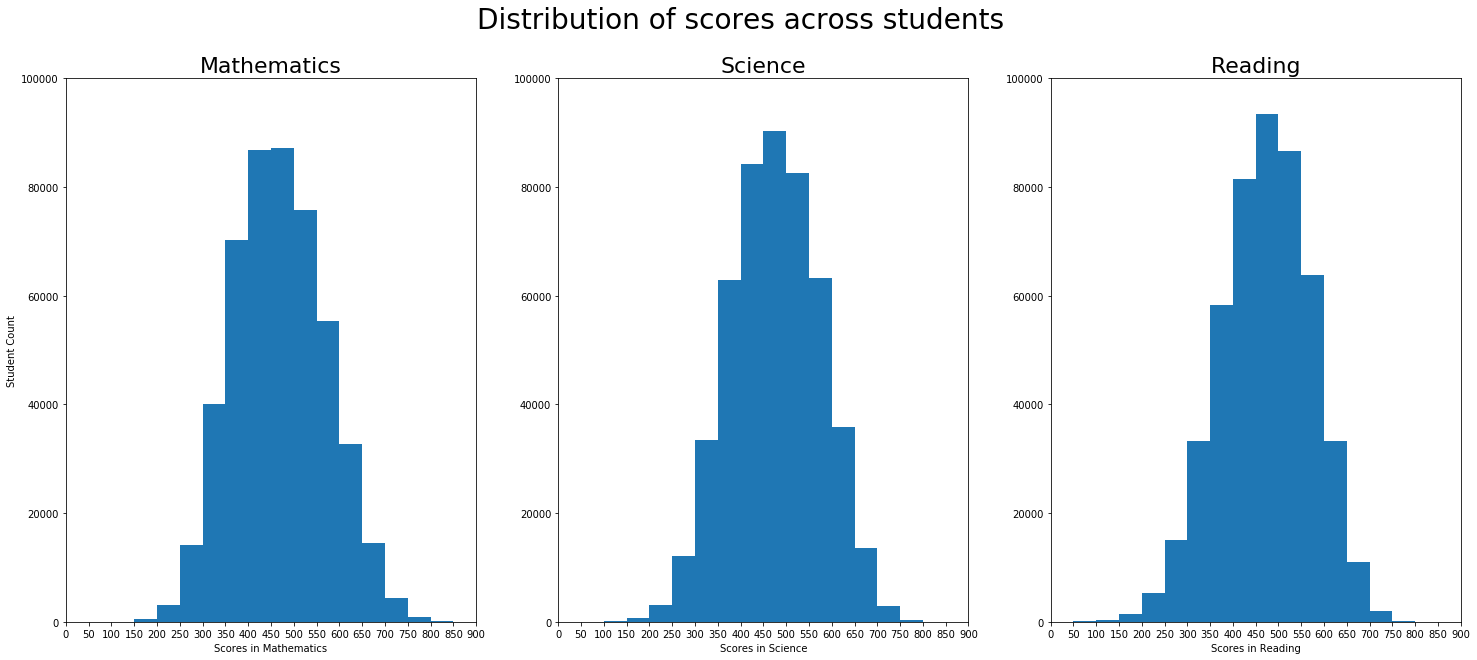

In [149]:
plt.figure(figsize = [25, 10])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 1)
plt.hist(pisa_2012_clean['Mathematics'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Mathematics');
plt.ylabel('Student Count')
plt.title("Mathematics", fontsize=22);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa_2012_clean['Science'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Science');
plt.title("Science", fontsize=22);

# subplot 3/3
plt.subplot(1, 3, 3)
plt.hist(pisa_2012_clean['Reading'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 100000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Scores in Reading');
plt.title("Reading", fontsize=22);
# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=28)
# save the output as png for further use
plt.savefig('univariate_barplot_subjectscores.png')
plt.show()

We see the following things:
* all distributions are unimodal
* the scores in each of the subjects seem to be normally distributed
* the major part of the students gets a score between 300 and 600

Let us confirm on this with an additional plot. We want to do a boxplot of the data and see if there are any differences between each subject.

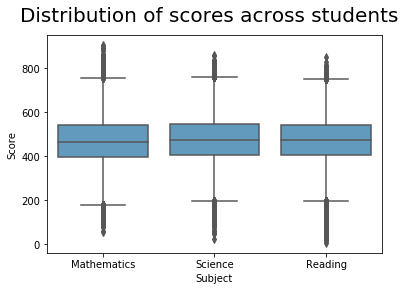

In [150]:
df = pisa_2012_clean[['Mathematics','Science','Reading']]
sns.boxplot(x="variable", y="value", data=pd.melt(df),color = sns.color_palette("Blues")[3])
plt.xlabel('Subject')
plt.ylabel('Score')
# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=20)
# save the output as png for further use
plt.savefig('univariate_boxplot_subjectscores.png')
plt.show()

All three boxes look quite the same. So there is no difference to see between the subjects (median values not significantly different). What we can observe is, that there are many outliers (points above und under the whiskers of the boxes).

Let's have a look at the overall performance of each country and see if there are any big differences.

In [151]:
# get the overall mean score for each country and drop the individual subject columns
df_country_comparison = pisa_2012_clean.groupby(['Country'])[['Mathematics','Science','Reading']].mean().reset_index()
df_country_comparison['Overall Performance'] = (df_country_comparison['Mathematics'] 
                          + df_country_comparison['Science'] 
                          + df_country_comparison['Reading']) / 3
df_country_comparison.drop(columns = ['Mathematics','Science','Reading'], inplace = True)

In [152]:
# get top performing countries
df_flop10_countries = df_country_comparison.sort_values('Overall Performance').head(10)
df_flop10_countries

,Country,Overall Performance
47,Peru,375.251032
50,Qatar,382.426012
26,Indonesia,385.160529
5,Brazil,392.827357
31,Jordan,394.683219
61,Tunisia,396.293283
0,Albania,396.681895
11,Colombia,403.018796
1,Argentina,403.236725
42,Montenegro,411.636659


In [153]:
# get worst performing countries
df_top10_countries = df_country_comparison.sort_values('Overall Performance').tail(10)
df_top10_countries

,Country,Overall Performance
38,Macao-China,522.702057
48,Poland,523.177114
17,Estonia,527.930247
35,Liechtenstein,528.253616
10,Chinese Taipei,534.284806
30,Japan,540.020395
33,Korea,542.463084
54,Singapore,551.037344
23,Hong Kong-China,553.520097
9,China-Shanghai,586.541569


7 countries out of 10 in the top-10 country list are in Asia. The other 3 countries are European countries.

Next we want to investigate the performances grouped by gender. Are there any subjects that show a difference between female and male students? What about the overall performance? 

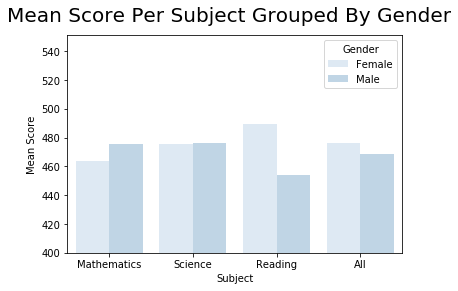

In [154]:
# compute the mean scores and an overall mean
df_gender_comparison = pisa_2012_clean.groupby(['Gender'])[['Mathematics','Science','Reading']].mean().reset_index()
df_gender_comparison['All'] = (df_gender_comparison['Mathematics'] 
                          + df_gender_comparison['Science'] 
                          + df_gender_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Gender','Subject','Mean Score']
df_gender = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_gender_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean Score",hue="Gender",data=df_gender, palette=sns.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_gendercomparison.png')
plt.show()

Especially for the Reading test we see a big difference in favor of the female students reaching more than 30 points more! Male students seem to be slightly better in Mathematics though while for the subject Science it seems to be very balanced. The overall performance of female students still seems to be better than the one from male students.

Next we want to see the impact of internet access on the performance.

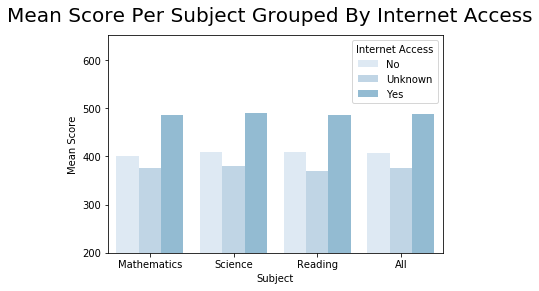

In [155]:
# compute the mean scores and an overall mean
df_internet_comparison = pisa_2012_clean.groupby(['Internet Access'])[['Mathematics','Science','Reading']].mean().reset_index()
df_internet_comparison['All'] = (df_internet_comparison['Mathematics'] 
                          + df_internet_comparison['Science'] 
                          + df_internet_comparison['Reading']) / 3
# initiate the output dataframe
cols = ['Internet Access','Subject','Mean Score']
df_internet_access = pd.DataFrame(columns=cols)
# iterate through dataframe and set up the desired structure in new dataframe
for index, row in df_internet_comparison.iterrows(): 
    for columnname in ['Mathematics','Science','Reading','All']:
        df_internet_access = df_internet_access.append({'Internet Access': row['Internet Access'],
                                 'Subject': columnname,
                                 'Mean Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean Score",hue="Internet Access",data=df_internet_access, palette=sns.color_palette("Blues"))
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Internet Access', fontsize=20)
plt.ylim(200, 650 + 1);
# save the output as png for further use
plt.savefig('univariate_boxplot_internetaccesscomparison.png')
plt.show()

Wow, that is amazing. I did not expect the impact to be that big. In each of the categories we see a significant difference in favor of the students that have internet access at home.

### Bivariate

In the bivariate part of the analysis we want to focus on the performances of different countries. Let's plot an overview figure comparing the performance of each country for each subject as well as the overall performance. All of the boxes need to be sorted descending.

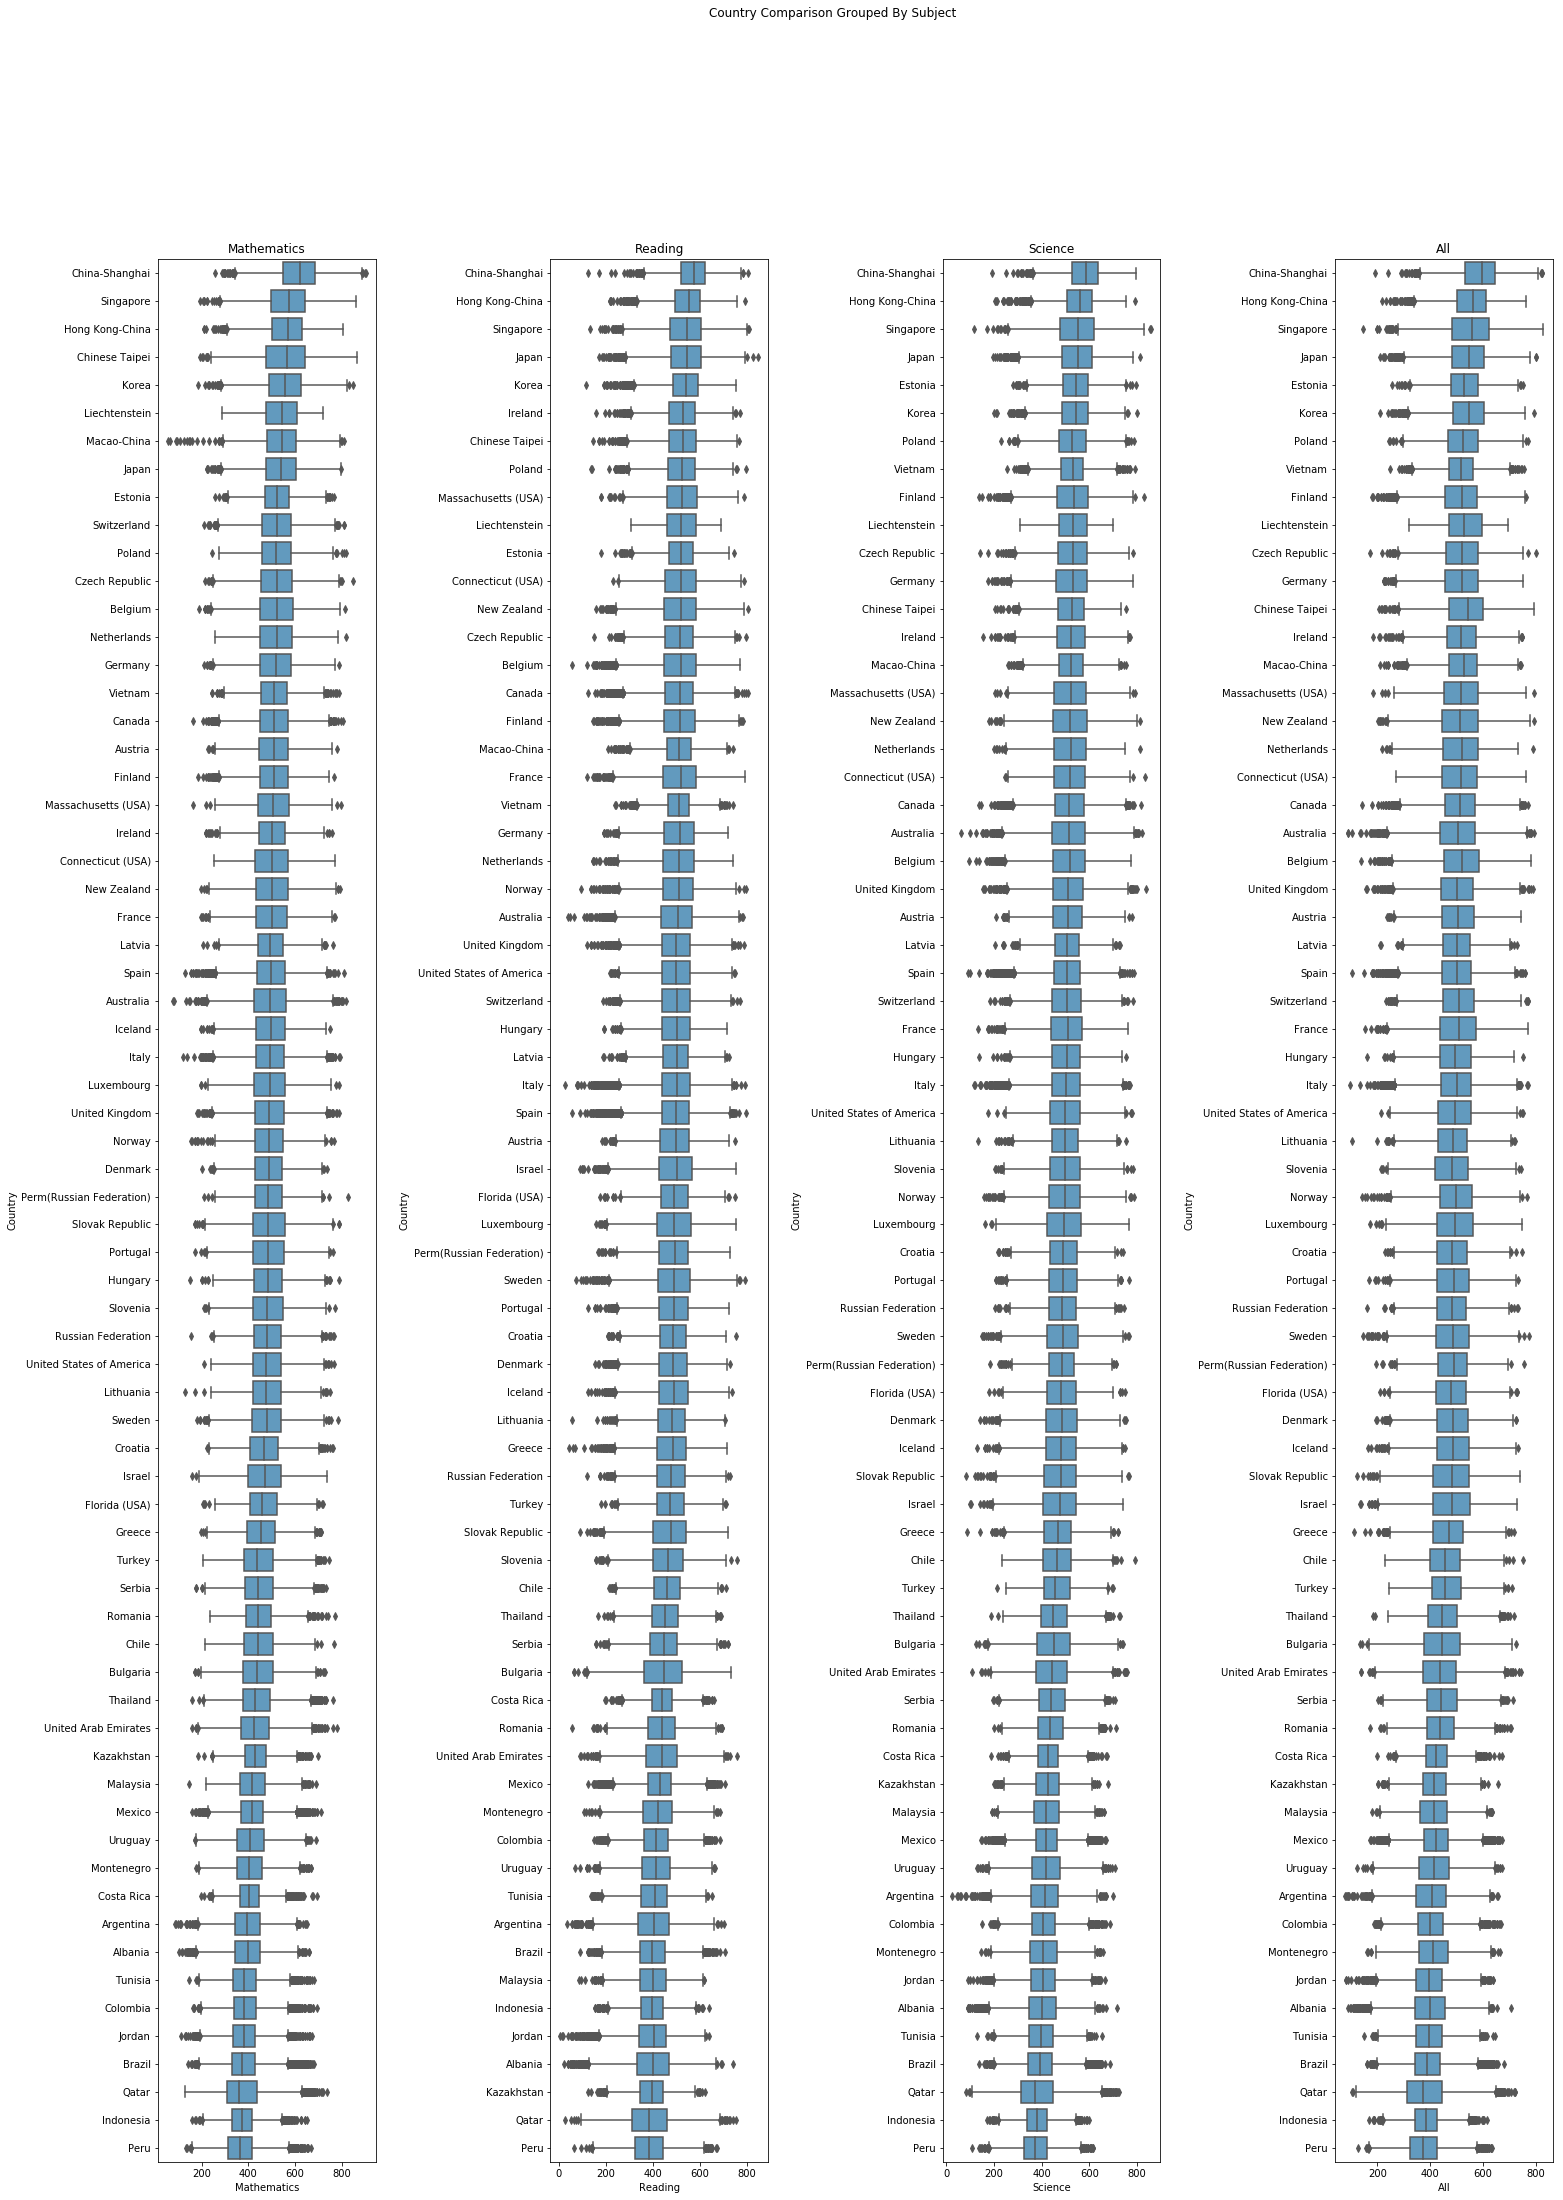

In [156]:
# set up the figure
plt.figure(figsize = [25, 35])
plt.subplots_adjust(wspace = 0.80) # control whitespace

pisa_2012_clean['All'] = (pisa_2012_clean['Mathematics'] 
                          + pisa_2012_clean['Science'] 
                          + pisa_2012_clean['Reading']) / 3

# set the orders descending
math_order = pisa_2012_clean.groupby('Country')['Mathematics'].mean().sort_values(ascending = False).index
reading_order = pisa_2012_clean.groupby('Country')['Reading'].mean().sort_values(ascending = False).index
science_order = pisa_2012_clean.groupby('Country')['Science'].mean().sort_values(ascending = False).index
all_order = pisa_2012_clean.groupby('Country')['All'].mean().sort_values(ascending = False).index

# subplot 1/4
plt.subplot(1, 4, 1)
sns.boxplot(x = pisa_2012_clean['Mathematics'], y = pisa_2012_clean['Country'], 
            order = math_order, color=sns.color_palette("Blues")[3]);
plt.ylabel('Country')
plt.title('Mathematics');

#subplot 2/4
plt.subplot(1, 4, 2)
sns.boxplot(x = pisa_2012_clean['Reading'], y = pisa_2012_clean['Country'], 
            order = reading_order, color=sns.color_palette("Blues")[3]);
plt.title('Reading');

# subplot 3/4
plt.subplot(1, 4, 3)
sns.boxplot(x = pisa_2012_clean['Science'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sns.color_palette("Blues")[3]);
plt.title('Science');

# subplot 4/4
plt.subplot(1, 4, 4)
sns.boxplot(x = pisa_2012_clean['All'], y = pisa_2012_clean['Country'], 
            order = science_order, color=sns.color_palette("Blues")[3]);
plt.title('All');

# set the overall title
plt.suptitle('Country Comparison Grouped By Subject');
# save the output as png for further use
plt.savefig('bivariate_boxplot_countrycomparison.png')
plt.show()

China-Shanghai is in the top spot for all of the subjects and therefore also tops the overall rankings. The opposite is the case for Peru that ranks last in all of the categories.

### Multivariate

First we want to further investigate the scores in each subject. We want to see if there are correlations between different subjects and therefore choose to plot a pairplot.

In [157]:
# source: https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [1]:
sb.pairplot(data = pisa_2012_clean, vars=["Mathematics", "Reading", "Science"]);

NameError: name 'sb' is not defined

We see a good correlation for all of the pair plots (0.88 / 0.93 / 0.91). This means that the performance of individual students for a specific subject does not vary much compared to the performance in other subjects. The strongest correlation between the subjects is between Mathematics and Science which does not seem very surprising.